In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

mnist = tf.keras.datasets.mnist

(trainX, trainY),(x_test, testY) = mnist.load_data()#Note that the pixel data ranges from 0 to 255

#Now we need to normalize it into values less than one which will be fruitful in the future
trainX = tf.keras.utils.normalize(trainX, axis= 1)
x_test = tf.keras.utils.normalize(x_test, axis=1)
#now the pixel values are all less than 1, this will significantly effect in future

#plt.imshow(trainX[0], plt.cm.binary) #cm = colour mapping
#plt.show()

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(trainX, trainY, epochs=3)

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 5s 85us/sample - loss: 0.2622 - acc: 0.9246
Epoch 2/3
60000/60000 [==============================] - 5s 85us/sample - loss: 0.1092 - acc: 0.9657
Epoch 3/3
60000/60000 [==============================] - 5s 85us/sample - loss: 0.0739 - acc: 0.9766


In [ ]:
val_loss, val_acc = model.evaluate(x_test, testY)
print(val_loss, val_acc)

10000/10000 [==============================] - 0s 39us/sample - loss: 49.9904 - acc: 0.9615
49.99038365064856 0.9615


In [ ]:
model.save('num_reader.model')

In [ ]:
predictions = model.predict([x_test])
print(predictions[0])

[1.8991408e-08 1.4038326e-06 6.8438225e-05 3.4197270e-05 2.8535905e-09
 1.9398237e-06 1.2396666e-11 9.9989367e-01 1.3933987e-07 1.7026119e-07]


In [ ]:
import numpy as np

print(np.argmax(predictions[1]))

2


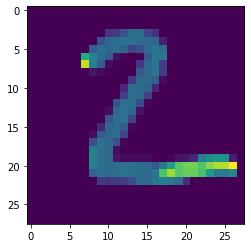

In [ ]:
plt.imshow(x_test[1])
plt.show()